# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 





<b>Ομάδα 103</b><br>
Σοφία Μπαρκάτσα(el18204)<br>
Μαργαρίτα Τσαρμποπούλου(el18848)<br>
Σμαραγδή Μπενέτου(el18048)

In [1]:
!pip install --upgrade somoclu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=288042 sha256=f8d24b91f4ba3d1495608fc158a62c0174d5b95fa45edf8183979a0221254589
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


In [2]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.9 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: pip's dependency resolver d

In [3]:
import pandas as pd

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με 22.301 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [4]:
dataset_url = "https://drive.google.com/uc?export=download&id=1zo13kUAf-MDMPZmBDxq1FxWtZY01lsxD"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)
df_data_1.head()

,0,1,2,3,4,5
0,975900,1,Ghosts of Mars,"""Thriller"", ""Science Fiction"", ""Horror"", ""A...","0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","Set in the second half of the 22nd century, th..."
1,9363483,4,White Of The Eye,"""Thriller"", ""Erotic thriller"", ""Psychologica...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",A series of murders of rich young women throug...
2,261236,5,A Woman in Flames,"""Drama""","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","Eva, an upper class housewife, becomes frustra..."
3,18998739,7,The Sorcerer's Apprentice,"""Family Film"", ""Fantasy"", ""Adventure"", ""Wor...","0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","Every hundred years, the evil Morgana returns..."
4,6631279,13,Little city,"""Romantic comedy"", ""Ensemble Film"", ""Comedy-...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","Adam, a San Francisco-based artist who works a..."


Κάθε ομάδα θα δουλέψει σε **ένα μοναδικό υποσύνολο 5.000 ταινιών** (διαφορετικό dataset για κάθε ομάδα) ως εξής:

1. Κάθε ομάδα του εργαστηρίου νευρωνικών έχει έναν αριθμό στο helios. Θα βάλετε τον αριθμό αυτό στη μεταβλητή team_seed_number στο επόμενο κελί κώδικα.

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [5]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 103

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1g6F4TCHrs2wgtdOk7D3gtONaeirNt_Vo"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values   #index of the movies for team 103

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus


- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- το dataframe **corpus_df** που είναι απλά το corpus σε μορφή dataframe. Τα summaries βρίσκονται στην κολόνα 0. Πιθανώς να σας βολεύει να κάνετε κάποιες προεπεξεργασίες με dataframes.


Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=999` (την χιλιοστή) θα γράψουμε `print(corpus[999])`.

In [6]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['180']
['"Short Film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Προεπεξεργασία

Το πρώτο βήμα στην επεξεργασία μας είναι ο καθαρισμός των περιγραφών των ταινιών. 

Εκτυπώστε (αρκετές) διαφορετικές περιγραφές ταινιών για να δείτε πιθανά προβλήματα που θα πρέπει να αντιμετωπιστούν.

Τα (ελάχιστα) βήματα καθαρισμού που προτείνουμε είναι:
- μετατροπή όλων των χαρακτήρων σε πεζά,
- αφαίρεση των stopwords. Εδώ σημειώστε ότι για το δεδομένο task του συστήματος συστάσεων που είναι η πρόταση ταινιών ίσως θα είχαν ενδιαφέρον και λίστες stopwords πέραν αυτών της κοινής γλώσσας.
- αφαίρεση σημείων στίξης και ειδικών χαρακτρήρων (special characters). Αυτό δεν γίνεται μόνο με την punkt του NLTK. Θα μπορούσατε να βασιστείτε σε κανονικές εκφράσεις (regular expressions), και
- αφαίρεση πολυ σύντομων συμβολοσειρών.

Προσοχή: το corpus και τα τελικά tokens που θα το αποτελούν θα χρησιμοποιηθούν στη συνέχεια ως κλειδιά για να βρούμε εμφυτεύματα. Για το λόγο αυτό, πρέπει να είστε προσεκτικοί ως προς την εφαρμογή μεθόδων κανονικοποίησης (text normalization) όπως το stemming και το lemmatization.

In [7]:
import nltk
from nltk.corpus import stopwords
import string


nltk.download('omw-1.4')
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')
nltk.download('punkt') # χρειάζεται για το tokenizer
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /usr/share/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Μελέτη Corpus
Τυπώνουμε τα πρώτα 10 descriptions του corpus έτσι ώστε να παρατηρήσουμε περίεργες εκφράσεις και ιδιαιτερότητες που θα χρειαστεί να αντιμετωπίσουμε.

In [8]:
for description in corpus[0:10]:
    print(description, "\n")

 As his contract nears expiration in March 1996, professional wrestler Bret "Hitman" Hart was torn between two companies, World Wrestling Federation  and World Championship Wrestling  during the Monday Night Wars. On one hand, the WWF was his home. The chairman of the company, Vince McMahon, is a father figure to Hart and takes credit for Hart's rise to international wrestling stardom. However, the company's new creative approach to marketing professional wrestling, the "WWF Attitude" marketing brand which relies on an emphasis on sex, extreme violence, and the replacing of heroic wrestling characters with disaffected anti-heroes in effort to compete against the already-popular WCW, has left Hart disillusioned. Ted Turner's WCW, on the other hand, was willing to pay him a great deal to "jump ship" as well as give him a fresh start in a company that offers a more wholesome approach. Hart chooses to remain loyal, and despite the fact that WWF's Raw Is War is losing the Monday Night Wars 

##### Πιθανά προβλήματα
1) Υπαρξη μη αγγλικών χαρακτήρων (πχ Shūhei, Yoshitarō, Lanctôt)

2) Σημεία στήξης: (πχ 32-year-old, car-repair, Ram.C.M)

3) Μεμονωμένα Γράμματα που απομένουν αφαιρώντας σημεία στήξης (πχ David J. , Hart's , won't) 

#### Επεξεργασία Corpus

In [9]:
def  filter_punctuation(desc):
    result = ""
    for character in desc:
        if character.isalpha() or character.isdigit():
            result = result + character
        elif character == ".":
            continue    # for acronym protection
        else:
            result = result + " "
    return result

In [10]:
import collections

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()


def preprocess_description(desc):
    #desc = "As his contract nears expiration in March 1996, professional ..."
  
    #Βήμα 1) 
    #μετατροπή όλων των χαρακτήρων σε πεζά
    desc = desc.lower()

    #Βήμα 2)
    #Aντικατάσταση όλων των σημείων στήξης με " " 
    desc = filter_punctuation(desc)

    #Βήμα 3)
    # tokenize (αφαίρεση special characters και spaces)
    words = nltk.word_tokenize(desc)

    #Βήμα 4)
    # Aφαίρεση stopwords & όσων σημείων στήξης μπορεί να έχουν απομείνει
    filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]

    #Bήμα 5)
    # stemming και lemmatization
    stemmed_words = [porter_stemmer.stem(wordnet_lemmatizer.lemmatize(word)) for word in filtered_words]

    #Βήμα 6)
    # Aφαίρεση πολυ σύντομων συμβολοσειρών
    stemmed_words = [word for word in words if len(word)>=2 and (word not in stopwords.words('english'))]    
   
  
    #Τέλος
    #Υπολογισμός συχνοτήτων (cnt)
    #cnt = collections.Counter(stemmed_words)
    #return cnt
    return stemmed_words

##### Επεξήγηση βήματος 2)
Για την αφαίρεση των σημείων στήξης, η συνάρτηση ***thorough_filter(words)*** που είδαμε στο εργαστήριο δεν επίλυσε τα προβήματα 2,3) που αναφέρθηκαν παραπάνω, αφού παρέμεναν ως λέξεις οι εξείς εκφράσεις:

* '32-year-old', '–', 'ram.c.m' *(πρόβλημα 2)*
* ' j. ', " 's "  *(πρόβλημα 3)*

Για αυτό κατασκευάστηκε μία νέα συνάρτηση, η filter_punctuation, η οποία διαβάζει έναν-έναν τους χαρακτήρες του description και τους αντικαθιστά με κενό (" "), εάν αυτοί δεν είναι αριθμοί ή γράμματα. Καλούμε αυτή την συνάρτηση πριν την tokenizer, η tokenizer να βρει όλες τις πιθανές λέξεις. Εν τέλει, αντί να έχουμε ως λέξη '32-year-old' έχουμε 3 διαφορετικές λέξεις: '32', 'year', 'old'

Στο σημείο αυτό αξίζει να επισημανθεί ένα πρόβλημα που μπορεί να προκύψει με αρκτικόλεξα. Αν μία ταινία για παράδειγμα σχετίζεται με κάποιον οργανισμό (NASA, CIA,...) και ο οργανισμός αυτός αναφέρεται στο κείμενο με την χρήση τελείας ως σημείο στήξης (δηλαδή "Ν.Α.S.A"), τότε η αντικατάσταση κάθε "." με " " θα επιστρέψει "Ν Α S A". Έτσι δυστυχώς θα χαθεί η πληροφορία, αφού καταλήγουμε με σκόρπια γράμματα, αντί για μία ενιαία λέξη.  Για αυτό, μόνο στην περίπτωση που έχουμε ως σημείο στήξης κάποια τελεία ("."), επιλέξουμε να την αντικαταστήσουμε με κενή συμβολοσειρά, αντί για τον χαρακτήρα space (" ") 



##### Επεξήγηση βήματος 6)
Η επίλυση του προβλήματος 3) δεν έχει επιτευχθεί πλήρως, αφού μετά την αφαίρεση όλων των σημείων στήξεων, παρέμειναν σκόρπια γράμματα ως λέξεις, όπως "t" από κάποιο "don't", "s" από κάποιο " 's " ή ακόμα και αρχικά ονομάτων (j), όπως σε περιπτώσεις "David J. Thurston".

Θεωρώντας -λοιπόν- ότι δεν μπορεί να βρεθεί χρήσιμη πληροφορία σε "λέξεις" που αποτελούνται από 1 μόλις χαρακτήρα, διαγράφουμε στο βήμα 6 όλα τα tokens με length <2

Παρατηρήθηκε επίσης ότι μετά το βήμα 5, εμφανίστηκαν με μεγάλη συχνότητα πολύ μικρές λέξεις όπως "hi" που μπορεί να προέκυψαν μέσω stemming σε λέξεις όπως "him", "his", "hit", κλπ.
Προέκυψαν ακόμα και λέξεις όπως "he", "is", "an" και λοιπές λέξεις της αγγλικής γλώσσας, που θα έπρεπε να είχαν διαγραφεί, ως λέξεις στο stopwords. 

Για αυτό αποφασίσαμε να διαγράψουμε όλες τις λέξεις μεγέθους <=2 και να διατρέξουμε εκ νέου την λίστα με τις λέξεις, διαγράφοντας όσες είναι stopwords.

In [11]:
import copy
initial_corpus = copy.deepcopy(corpus)

In [12]:
from tqdm import tqdm
corpus = [preprocess_description(descr) for descr in tqdm(initial_corpus)]

100%|██████████| 5000/5000 [07:58<00:00, 10.45it/s]


In [13]:
for descr in corpus[0:8]:
    print(descr)

['contract', 'nears', 'expiration', 'march', '1996', 'professional', 'wrestler', 'bret', 'hitman', 'hart', 'torn', 'two', 'companies', 'world', 'wrestling', 'federation', 'world', 'championship', 'wrestling', 'monday', 'night', 'wars', 'one', 'hand', 'wwf', 'home', 'chairman', 'company', 'vince', 'mcmahon', 'father', 'figure', 'hart', 'takes', 'credit', 'hart', 'rise', 'international', 'wrestling', 'stardom', 'however', 'company', 'new', 'creative', 'approach', 'marketing', 'professional', 'wrestling', 'wwf', 'attitude', 'marketing', 'brand', 'relies', 'emphasis', 'sex', 'extreme', 'violence', 'replacing', 'heroic', 'wrestling', 'characters', 'disaffected', 'anti', 'heroes', 'effort', 'compete', 'already', 'popular', 'wcw', 'left', 'hart', 'disillusioned', 'ted', 'turner', 'wcw', 'hand', 'willing', 'pay', 'great', 'deal', 'jump', 'ship', 'well', 'give', 'fresh', 'start', 'company', 'offers', 'wholesome', 'approach', 'hart', 'chooses', 'remain', 'loyal', 'despite', 'fact', 'wwf', 'raw',

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [14]:
#dummy function that will be used for tokenizing
# code from https://www.davidsbatista.net/blog/2018/02/28/TfidfVectorizer/
def dummy_fun(doc):
    return doc

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create sparse tf_idf representation
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    max_df = 0.20,
    min_df = 0.002,
    stop_words='english')

"""
Επιλέχθηκε να κρατήσουμε τις λέξεις που δεν βρίσκονται σε πάνω απο το 20% των αρχείων, 
δηλαδή που δεν είναι σε πάνω από 1000 ταινίες από τις 5000 (max_df = 0.20).
Επίσης, ανάμεσα στις λιγότερο συχνές λέξεις, δεν κρατήσαμε όσες εμφανίζονται σε λιγότερα
από το 0.2% των αρχείων. Αυτό σημαίνει ότι κρατάμε λέξεις που είναι σε τουλάχιστον 10 
περιγραφές ταινίας.
"""

vectorizer.fit(corpus)
corpus_tf_idf_plain = vectorizer.transform(corpus)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  % sorted(inconsistent)


Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης.

Προσοχή: ο TfidfVectorizer έχει κάποιες δυνατότητες προεπεξεργασίας παρόποιες με αυτές που αναφέραμε στην προηγούμενη ενότητα. Ό,τι προεπεξεργασία μπορείτε να κάνετε που χρειάζεται ως είσοδο μόνο το κάθε document ξεχωριστά, κάντε την στο πρώτο βήμα της προεπεξεργασίας. Αν χρειάζεται γνώση των συνολικών στατιστικών της συλλογής, κάντε την με τον TfidfVectorizer.

In [16]:
print(corpus_tf_idf_plain.shape)

(5000, 8228)


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση `content_recommender` με τρία ορίσματα: `target_movie`, `max_recommendations` και `corpus_type`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, θα υπολογίζετε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο `corpus_type`.
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


In [17]:
from sklearn.metrics.pairwise import cosine_similarity as cs


def content_recommender(target_movie, max_recommendations, corpus_type):
    '''
        target_movie:          int
        max_recommendations:   int
        corpus_type:         numpy array
    '''
    cosine_similarities = []
    
    for i in range(corpus_type.shape[0]):
      # Υπολογίζουμε το Cosine Similarity της ταινίας target_movie, με όλες τις άλλες ταινίες
      # [corpus_type[i]] = πίνακας 1*(πλήθος λέξεων), που δείχνει την συχνότητα εμφάνισης 
      # καθε μίας λέξης στην ταινία με id = i
      cosine_similarities.append( float(cs([corpus_type[target_movie]], [corpus_type[i]])) )


    #Ταξινομημούμε τον πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (ID) των ταινιών.
    sorted_cosine_IDs = np.flip(np.argsort(cosine_similarities))
    
    #Εμφανίζουμε τις προτάσεις:
    # 1) Εμφανιση αρχικής ταινίας
    print(f"""Movie : {titles[target_movie][0]} 
    Category: {categories[target_movie][0]}
    Description:
    {initial_corpus[target_movie]}""")

    # Εμφάνιση όλων των προτάσεων
    print(f"\n\n ~~~~~~~ Suggested Movies ~~~~~~~~~~~~~~~~~~~")
    for i in range(1, max_recommendations+1):
        movie_index = sorted_cosine_IDs[i]
        print(f""" {i})  {titles[movie_index][0]}
        Cosine Similarity: {cosine_similarities[movie_index]} 
        Category: {categories[movie_index][0]}
        Description:
        {initial_corpus[movie_index]}
          """)

In [18]:
# Μια τυχαία δοκιμή
content_recommender(10, 3, corpus_tf_idf_plain.toarray())

Movie : Gutterballs 
    Category: "B-movie",  "Horror",  "Slasher",  "Teen",  "Horror Comedy"
    Description:
     The film opens at Xcalibur Bowling Centre, a disco-themed bowling alley in Surrey, British Columbia. Egerton , the janitor, has allowed two groups of teenagers to bowl against one another after hours. The "prep", Steve , is still bitter after his best friend Jamie , the "jock", had sex with Lisa , a girl with whom Steve was smitten and even took to their senior prom. After Steve and his friends Joey , Patrick  and A.J.  harass the "tranny", Sam , they are chastised by Jamie. This leads to a brawl between Steve's team and Jamie's. Lisa breaks up the fight by dropping a bowling ball on Steve's foot just as Steve is about to kick Jamie again. Egerton, brandishing a shotgun, tells the teenagers to leave and they can continue their tournament the following night. Lisa, having forgot her purse in the arcade, returns to find Steve and his friends waiting for her. Steve proceeds

Μετά από αρκετές τυχαίες δοκιμές, παρατηρήσαμε ότι συγκρίνοντας τις κατηγορίες της αρχικής ταινίες με αυτές των προτάσεων, υπάρχουν σχετικές αποκλίσεις, ωστόσο τα αποτελέσματα δεν είναι αποθαρρυντικά. 
Για παράδειγμα η 1000η ταινία C.H.O.M.P.S, θεωρείται family film και comedy, κάτι που χαρακτηρίζει και τις 3 προτάσεις που επέστρεψε ο αλγόριθμός μας. 

Στην 10η ταινία όμως δεν είχαμε το ίδιο καλά αποτελέσματα από πλευράς κατηγοριών, αφού ενώ αρχική ταινία ήταν κυρίως τρόμου, η δεύτερη προτεινόμενη ταινία ήταν αθλητική κωμωδία.

## Βελτιστοποίηση του TfidfVectorizer

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε την για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. 

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




#### 1000η ταινία
Η 1000η ταινία έχει αρκετά καλά αποτελέσματα, αφού και οι 5 καλύτερες προτάσεις είναι σωστού είδους. Θα χρησιμοποιήσουμε αυτή την ταινία για να ελέγχουμε ότι οι αλλαγές στην TfidfVectorizer δεν επέφεραν χειρότερα αποτελέσματα. 

In [19]:
content_recommender(1000, 5, corpus_tf_idf_plain.toarray())

Movie : C.H.O.M.P.S 
    Category: "Family Film",  "Animal Picture",  "Comedy",  "Adventure"
    Description:
    A young inventor - Brian Foster  creates a robotic dog for use as part of a home protection system. C.H.O.M.P.S. is an acronym for "Canine HOMe Protection System." Ralph Norton  is his boss who he constantly argues with. Norton's daughter Casey  and Foster develop a relationship. A rival company wants the dog and sends a few petty criminals to dognap "C.H.O.M.P.S."


 ~~~~~~~ Suggested Movies ~~~~~~~~~~~~~~~~~~~
 1)  Love My Dog
        Cosine Similarity: 0.24123899157047268 
        Category: "Short Film",  "Silent film",  "Family Film",  "Comedy",  "Black-and-white"
        Description:
        Jr shares his chicken with a dark colored dog that has a bad leg. Joe and Farina arrive on the scene, and cooks up a scheme to enter the dog in a dog show. Everything is fun and games until the dog catchers appear. The Gang and the dog catchers go back and forth capturing and losin

#### 9η ταινία
Όπως φαίνεται παρακάτω, η 9η ταινία (Crime Fiction & Comedy) είχε αρκετά καλά αποτελέσματα στις πρώτες 2 προτάσεις της, αφού αυτές ήταν του ίδιου είδους. Ελπίζουμε ότι οι αλλαγές στην TfidfVectorizer θα μας δώσουν ακόμα περισσότερες καλές προτάσεις για την ταινία αυτή

In [20]:
content_recommender(9, 5, corpus_tf_idf_plain.toarray())

Movie : Lucky Losers 
    Category: "Crime Fiction",  "Comedy"
    Description:
    Slip and Sach's boss, David J. Thurston, has allegedly committed suicide. Slip finds a book of matches with the name of a local nightclub on his boss' desk and finds out from Gabe that a gambling casino is being run out of it. Slip comes to the conclusion that the club had something to do with his boss' death and sets out to find his murderer. The boys get jobs at the club and Louie poses as a rich cattlemen as they gather the information to convict the murderers.


 ~~~~~~~ Suggested Movies ~~~~~~~~~~~~~~~~~~~
 1)  Angels in Disguise
        Cosine Similarity: 0.35069388300545556 
        Category: "Crime Fiction",  "Comedy"
        Description:
        Sach and Slip are copy boys for the local newspaper and they hear their friend Gabe, a local police officer, has been shot in the line of duty. The go and visit him and find out that another police officer was killed by the same gangsters that shot Gabe

#### 8η ταινία
Όπως φαίνεται παρακάτω, η 8η ταινία (ιστορικό - πολεμικό δράμα) είχε μία καλή πρώτη σύσταση (ταινία που επίσης σχετίζεται με πολεμικά γεγονότα WW2). Η δεύετρη όμως σύσταση είναι πολύ κακή. Πρόκειται για μία ταινία κινουμένων σχεδίων Tom & Jerry, που φυσικά δεν έχει τίποτα κοινό με την αρχική μας ταινία. Και το ίδιο συμβαίνει και με την τρίτη πρόταση, που είναι και αυτή κινούμενα σχέδια.
Ελπίζουμε με αλλαγές στην TfidfVectorizer να βελτιωθούν σημαντικά τα αποτελέσματα αυτά.

In [21]:
content_recommender(8, 3, corpus_tf_idf_plain.toarray())

Movie : Islands in the Stream 
    Category: "Drama",  "War film"
    Description:
    Like the novel, the story is about artist Thomas Hudson, an American who has left the civilized world for the simple life in the Caribbean. Schaffner tells the tale in four parts: *The Island - Introduces Hudson and the people he knows. The area is The Bahamas, and the time is 1940. While he is glad to see his friends, Tom, as he is called, is concerned about his friend Eddy, who loves to drink and brawl with anyone he finds. Later the residents of the island and Tom celebrate the Queen Mother's Anniversary. *The Boys - Weeks after the celebrations for the Queen Mother, Tom sees his three sons for the first time. It is a bittersweet reunion as he had left them and his wife Audrey many years ago. Later, the four, including the youngest David, go on a challenging fishing trek to catch a Marlin. The segment ends as the boys return to the United States, while oldest son Tom joins the Royal Air Force in t

### Δοκιμές

#### Ταινία 8
Ξεκινήσαμε τροποποιώντας τις παραμέτρους max_df, min_df με τρόπο τέτοιο ώστε να βρούμε καλύτερες προτάσεις στην ταινία με ID = 8. 
- Στόχος ήταν να κρατήσουμε στην πρώτη θέση των προτάσεων την ταινία Good Night Mr Tom, η οποία με βάση τις περιγραφές, ταιριάζει πολύ στην αρχική μας ταινία. Αυτό συνέβαινε όσο min_df <= 0.007. 
- Δεύτερος στόχος είναι να εμφανιστούν τα Cartoon Tom & Jerry όσο πιο χαμηλά γινόταν, στην λίστα προτάσεων. Για μεγαλύτερες τιμές του min_df, τα κινούμενα σχεδια εμφανίζονταν μέχρι και στην πρώτη θέση, οπότε διαλέξαμε τιμή min_df = 0.006.

#### Ταινία 9
Στην ταινία 9 είχαμε ως προτεινόμενες προηγουμένως 2 ταινίες της ίδιας σειράς, στις θέσεις 1 και 5 των προτάσεων. Αυτό το καταλαβαίνουμε καθώς και στην αρχική ταινία αλλά και στις προτάσεις 1, 5 ως πρωταγωνιστές εμφανίζονται οι Slip and Sach. Ξανατρέχουμε την συνάρτηση προτάσεων με min_df = 0.006 και παρατηρούμε ότι η ταινία που ήταν στην θέση 5 των προτάσεων ανέβηκε στην 2η θέση, ενώ στην 1η θέση παρέμεινε η άλλη ταινία με τους Slip and Sach. Άρα η τιμή min_df = 0.006 λειτούργησε εξαιρετικά και για την 9η ταινία.

#### Ταινία 1000 και λοιπές
Δοκιμάσαμε τέλος για επαλήθευση να βρούμε προτάσεις σε ταινίες που ήδη είχαν καλές προτάσεις, όπως η 1000η ταινία, και τα αποτελέσματα ήταν εξίσου καλά με προηγουμένως.


In [22]:
#Δοκιμές βελτιστοποίσης
new_vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    max_df = 0.15,
    min_df = 0.006,
    stop_words='english')

new_vectorizer.fit(corpus)
new_corpus_tf_idf_plain = new_vectorizer.transform(corpus)
print(new_corpus_tf_idf_plain.shape)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  % sorted(inconsistent)


(5000, 3425)


In [222]:
len(corpus)
new_corpus_tf_idf_plain.shape

(5000, 3425)

In [23]:
content_recommender(8, 5, new_corpus_tf_idf_plain.toarray())

Movie : Islands in the Stream 
    Category: "Drama",  "War film"
    Description:
    Like the novel, the story is about artist Thomas Hudson, an American who has left the civilized world for the simple life in the Caribbean. Schaffner tells the tale in four parts: *The Island - Introduces Hudson and the people he knows. The area is The Bahamas, and the time is 1940. While he is glad to see his friends, Tom, as he is called, is concerned about his friend Eddy, who loves to drink and brawl with anyone he finds. Later the residents of the island and Tom celebrate the Queen Mother's Anniversary. *The Boys - Weeks after the celebrations for the Queen Mother, Tom sees his three sons for the first time. It is a bittersweet reunion as he had left them and his wife Audrey many years ago. Later, the four, including the youngest David, go on a challenging fishing trek to catch a Marlin. The segment ends as the boys return to the United States, while oldest son Tom joins the Royal Air Force in t

In [24]:
content_recommender(9, 5, new_corpus_tf_idf_plain.toarray())

Movie : Lucky Losers 
    Category: "Crime Fiction",  "Comedy"
    Description:
    Slip and Sach's boss, David J. Thurston, has allegedly committed suicide. Slip finds a book of matches with the name of a local nightclub on his boss' desk and finds out from Gabe that a gambling casino is being run out of it. Slip comes to the conclusion that the club had something to do with his boss' death and sets out to find his murderer. The boys get jobs at the club and Louie poses as a rich cattlemen as they gather the information to convict the murderers.


 ~~~~~~~ Suggested Movies ~~~~~~~~~~~~~~~~~~~
 1)  Angels in Disguise
        Cosine Similarity: 0.39883670519081693 
        Category: "Crime Fiction",  "Comedy"
        Description:
        Sach and Slip are copy boys for the local newspaper and they hear their friend Gabe, a local police officer, has been shot in the line of duty. The go and visit him and find out that another police officer was killed by the same gangsters that shot Gabe

#### Συμπέρασμα & Απόδοση
χρησιμοποιώντας max_df = 0.15 και min_df = 0.006, καταλήξαμε να έχουμε 3425 λέξεις, αντί για 8228 που είχαμε προηγουμένως, γεγονός που θα έχει τεράστιο αντίκτυπο στην ταχύτητα με την οποία γίνεται οποισδήποτε υπολογισμός.

## Βαθιά μάθηση: δημιουργία corpora με χρήση word emmbeddings

Η προσέγγιση της κατασκευής μόνο μέσω tfidf του συστήματος συστάσεων έχει διάφορα μειονεκτήματα. Θα μας ενδιέφερε λοιπόν να δούμε αν μπορούμε να χρησιμοποιήσουμε για τις λέξεις **εμφυτεύματα (embeddings)**, δηλαδή τις πυκνές διανυσματικές αναπαραστάσεις για τις λέξεις που μας δίνει το μοντέλο **Word2Vec**

Ωστόσο, το dataset της κάθε ομάδας είναι πολύ μικρό για να εξάγουμε τα δικά μας word embeddings (και να είναι καλά). Για το λόγο αυτό θα χρησιμοποιήσουμε τη μεθοδολογία της Βαθιάς Μάθησης που είναι η **Μεταφορά Μάθησης (Transfer Learning).**.

Στη μεταφορά μάθησης ουσιαστικά μεταφέρουμε τη γνώση που έχει αποκτήσει ένα ήδη εκπαιδευμένο (και κατά κανόνα πολύ μεγάλο) σύστημα. Η μεταφορά γίνεται διαμέσου των τιμών των βαρών που έχει προσδιορίσει μετά το πέρας της εκπαίδευσης.

Στην περίπτωσή μας, δεν μας ενδιαφέρουν τόσο τα ίδια τα βάρη των μοντέλων από τα οποία θα κάνουμε μεταφορά μάθησης. Κάτι τέτοιο θα μας ενδιέφερε αν π.χ. θέλαμε να συνεχίσουμε την εκπαίδευση στα δικά μας κείμενα. Μας ενδιαφέρουν όμως τα ίδια τα εμφυτεύματα, δηλαδή τα embeddings (διανύσματα διαστάσεων $m$) που έχει μάθει το νευρωνικό για το λεξιλόγιο του (vocabulary). To vocabulary σε τέτοια μεγάλα νευρωνικά θα είναι πιθανότατα υπερσύνολο του δικού μας.

### Μεταφορά μάθησης εμφυτευμάτων



#### Εμφυτεύματα του Gensim-data
Το Gensim περιλαμβάνει αρκετά προεκπαιδευμένα μοντέλα εμφυτευμάτων Word2Vec. Με το επόμενο κελί παίρνουμε τη λίστα τους.

In [25]:
#!pip install -U gensim
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [87]:
model = gensim.downloader.load("glove-twitter-25")  
model.most_similar("cat")


[('dog', 0.9590820074081421),
 ('monkey', 0.920357882976532),
 ('bear', 0.9143136739730835),
 ('pet', 0.9108031392097473),
 ('girl', 0.8880629539489746),
 ('horse', 0.8872726559638977),
 ('kitty', 0.8870542049407959),
 ('puppy', 0.886769711971283),
 ('hot', 0.886525571346283),
 ('lady', 0.8845519423484802)]

In [92]:
model.get_vector("cat")

array([-0.96419 , -0.60978 ,  0.67449 ,  0.35113 ,  0.41317 , -0.21241 ,
        1.3796  ,  0.12854 ,  0.31567 ,  0.66325 ,  0.3391  , -0.18934 ,
       -3.325   , -1.1491  , -0.4129  ,  0.2195  ,  0.8706  , -0.50616 ,
       -0.12781 , -0.066965,  0.065761,  0.43927 ,  0.1758  , -0.56058 ,
        0.13529 ], dtype=float32)

Τα μοντέλα αυτά βρίσκονται στο [αποθετήριο Gensim-data](https://github.com/RaRe-Technologies/gensim-data) όπου μπορείτε να βρείτε και την τεκμηρίωσή τους. Η φόρτωση των μοντέλων αυτών γίνεται με τη συνάρτηση `gensim.downloader.load`.

#### Άλλα εμφυτεύμαατα
Μπορείτε να βρείτε προεκπαιδευμένα εμφυτεύματα και από πηγές εκτός του Gensim. Για παράδειγμα:

- [Google News dataset](https://code.google.com/archive/p/word2vec/). Πρόκειται για προ-εκπαιδευμένα διανύσματα που έχουν εκπαιδευτεί σε μέρος του συνόλου δεδομένων Google News (περίπου 100 δισεκατομμύρια λέξεις). Το μοντέλο περιέχει διανύσματα 300 διαστάσεων για 3 εκατομμύρια λέξεις και φράσεις.
- [Amazon BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html). Το BlazingText δεν είναι μόνο προεκπαιδευμένα εμφυτεύματα αλλα και βελτιστοποιημένες υλοποιήσεις των αλγορίθμων Word2vec για την επεξεργασία κειμένου. Προυπόθεση είναι να δουλέψει κανείς στο SageMaker.

Οι διαδικασίες φόρτωσης embeddings από εξωτερικά δεδομένα μπορεί να είναι ελαφρά διαφορετικές από αυτή του Gensim.



#### Παρατηρήσεις

*   Επαναλαμβάνουμε ότι στην εργασία αυτή δεν μας ενδιαφέρουν τα ίδια τα μοντέλα αλλά το να μπορούμε για μία λέξη του λεξιλογίου μας να μπορούμε να βρούμε το embedding (διάνυσμα) που της αντιστοιχεί στο εκάστοτε προεκπαιδευμένο μοντέλο. 

*   Επίσης, δεν θα χρησιμοποιήσουμε την `Phrases` για να βρούμε bigrams στο dataset μας όπως θα ήταν το ορθότερο, καθώς αυτό θα απαιτούσε την συνέχιση της εκπαίδευσης του μοντέλου σε νέο λεξιλόγιο με πολύ λίγα νέα δεδομένα.


 ### Δημιουργία corpora βασισμένων στα εμφυτεύματα

Για να μπορέσουμε να ενσωματώσουμε τη γνώση που υπάρχει στα προεκπαιδευμένα εμφυτεύματα στο δικό μας corpus θα προχωρήσουμε όπως περιγράφεται ακολούθως.

Για κάθε περιγραφή ταινίας $d$, η οποία αποτελείται από τις $N_d$ λέξεις $w_i$, το  $tfidf$ της κάθε λέξης $w_i$ δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει. Τα διανύσματα εμφυτευμάτων $W2V$ θα έχουν διάσταση $m$, ανάλογα το μοντέλο. 

Για κάθε ταινία d, μπορούμε να δημιουργήσουμε μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


#### build_tfw2v

Υλοποιήστε μια συνάρτηση `build_tfw2v` με ορίσματα:
- `corpus` που θα είναι το προεπεξεργασμένο dataset σας,
- `vectors` που θα είναι το μοντέλο που θα σας δίνει τα διανύσματα των εμφυτεύσεων vectors, και 
- `embeddings_size` που θα είναι η διάσταση των εμφυτευμάτων $m$.

H συνάρτηση αυτή θα επιστρέφει ένα νέο corpus που θα είναι ένας πίνακας 5000 (όσες οι ταινίες σας) x $m$ (το η διάσταση των εμφυτευμάτων). Ανάλογα ποιο μοντέλο χρησιμποιείτε για transfer learning ο πίνακας αυτός θα είναι διαφορετικός.

Μπορείτε πλεόν να καλείτε την `content_recommender` με διαφορετικά corpora στο όρισμα `corpus_type`. Σημειώστε ότι στο TFidfVectorizer χρησιμοποιουμε τη σειριακή μορφή των numpy arrays και ίσως σας χρησιμεύσει η `sparse.csr_matrix()` από την Scipy.

corpus = # of movies x # of words (5000 x 3425)</br>
new_corpus = # of movies x m (5000 x m)

In [143]:
corpus_tfidf = copy.deepcopy(new_corpus_tf_idf_plain)

(5000, 3425)

In [271]:
def word2vec(string, m, model) :
    emb = np.asarray([0.0 for i in range(m)], dtype=np.float32)
    if string in model.key_to_index :
        emb = model.get_vector(string)[:m]
    return emb
cor_vec = word2vec(corpus[0][0], 25, model)


In [288]:
def buildtfw2v(corpus, vectors, embeddings_size) :
    corpus_trans = []
    for movie in range(len(corpus)):
        den = 0
        num = 0
        word_tfidf = dict(zip(new_vectorizer.get_feature_names_out(), corpus_tfidf[movie].toarray()[0]))
        for word in corpus[movie] :
            if word in new_vectorizer.get_feature_names_out():
                tfidf = word_tfidf[word]
                vec = word2vec(word,embeddings_size, vectors)
                den += tfidf
                num += tfidf*vec
        corpus_trans.append(num/den)
    return corpus_trans
    

Κρατάμε μόνο τα 1000 πρωτα δείγματα για να μειώσουμε τον χρόνο εκτέλεσης

In [289]:
corpus_embeddings = buildtfw2v(corpus[:1000], model, 15)

In [290]:
len(corpus_embeddings[0])

15

In [296]:
from scipy.sparse import csr_matrix
corpus_embeddings = csr_matrix(corpus_embeddings)

## Ανάλυση αποτελεσμάτων

### Σύστημα συστάσεων βασισμένο μόνο στο tfidf

- Σε markdown περιγράψτε τι προεπεξεργασία κάνετε στα κείμενα και γιατί.

- Περιγράψτε πως προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. 

- [Cherry-picking:](https://www.wikiwand.com/en/Cherry_picking) Δώσετε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (τουλάχιστον 5) και σχολιάστε.

- [Nit-picking:](https://en.wikipedia.org/wiki/Nitpicking) Δώστε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν κακά αποτελέσματα και σχολιάστε.

- Ποια είναι συνολικά τα πλεονεκτήματα και μειονεκτήματα ενός recommender βασισμένου στο tfidf;

### Σύγκριση και σχολιασμός με recommenders βασισμένων στο Word2Vec

- Υλoποιήστε recommenders που βασίζονται σε μεταφορά μάθησης και εμφυτεύματα. Χρησιμοποιήστε παραδείγματα για να υποδείξετε δυνατά και αδύναμα σημεία τους.

- Μπορείτε να σχολιάσετε τα recommenders που βασίζονται στο Word2Vec σε σχέση με το απλό μοντέλο tfidf, εξετάζοντας τις συστάσεις για ίδια ID.

- Μπορείτε επίσης να εξετάσετε συγκριτικά τα Word2Vec recommenders μεταξύ τους και πάλι βασιζόμενοι σε παραδείγματα.

- Οι παρατηρήσεις σας θα βασίζονται στην ανάλυση των ποιοτικών χαρακτηριστικών που είναι η σειρά και το σύνολο των συστάσεων. Ωστόσο, μπορείτε να συμπεριλάβετε και ποσοτικά χαρακτηριστικά όπως τους χρονους loading και συγκρότησης του corpus αλλά και της διαστατικότητας $m$.

Χρησιμοποιήστε όποια μορφή reporting κρίνετε καταλληλότερη: κείμενο, πίνακες, διαγράμματα.


In [27]:
import joblib

joblib.dump(corpus_embeddings, 'corpus_embeddings.pkl') 



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [28]:
#!ls -lh

και μπορούμε να τα διαβάσουμε με `joblib.load`

In [29]:
corpus_embeddings = joblib.load('corpus_embeddings.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Διαλέξτε για την αναπαράσταση των documents αυτήν που πιστεύετε απέδωσε καλύτερα στο πρώτα σκέλος της άσκησης. Έστω ότι αυτή είναι η `my_best_corpus`.

Η έτοιμη συνάρτηση `build_final_set` θα ενώσει την αναπαράσταση που θα της δώσετε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.

Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM. 

Θα τρέχουμε τη συνάρτηση με `final_set = build_final_set(my_best_corpus)`.

In [297]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

Στο επόμενο κελί, τυπώνουμε τις διαστάσεις του τελικού dataset μας. **Χωρίς βελτιστοποίηση του TFIDF** θα έχουμε περίπου 50.000 χαρακτηριστικά και ο θα είναι ανέφικτο να προχωρήσουμε στην εκπαίδευση του SOM.

In [298]:
final_set = build_final_set(copy.deepcopy(corpus_embeddings),1000)

In [299]:
final_set.shape

(1000, 337)

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [300]:
# install somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. 

In [301]:
n_rows, n_columns = 10, 10
som = somoclu.Somoclu(n_columns, n_rows)
%time som.train(final_set,epochs=100)

CPU times: user 7.91 s, sys: 25.7 ms, total: 7.94 s
Wall time: 2.03 s



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων στη Somoclu είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python**. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. 

Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


Bmu για πλέγμα 10x10 εκπαιδευμένο σε 100 εποχές

In [302]:
bmu_10_10_100 = som.bmus

In [303]:
bmu_10_10_100

array([[3, 0],
       [3, 3],
       [7, 6],
       ...,
       [3, 0],
       [9, 1],
       [6, 1]], dtype=int32)

In [304]:
u, indices = np.unique(bmu_10_10_100, return_inverse=True, axis=0)

In [305]:
u[:12]

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9],
       [1, 0],
       [1, 1]], dtype=int32)

Όντως έχουμε λιγότερα bmu (94) από νευρώνες(100) επομένως κάποιοι δεν χρησιμοποιήθηκαν

In [306]:
u.shape

(99, 2)

Κάθε θέση i του πίνακα indices δίνει το αριθμό bmu από τη λίστα u της ταινίας i στην λίστα bmu_10_10_100

In [307]:
indices[:10]

array([29, 32, 75,  5, 95,  0, 76, 48, 77, 89])


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [308]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=25, random_state=42)
som.cluster(algorithm=kmeans)

Παρατηρούμε ότι ο δισδιάστατος πίνακας νευρώνων έχει χωριατει σε 25 περιοχές ομαδοποιώντας τους νευρώνες σε clusters

In [309]:
som.clusters

array([[ 6,  6,  3,  3,  3,  8, 17, 17,  7,  7],
       [10,  6, 15,  3,  3,  8,  8,  7,  7,  7],
       [10, 10, 15, 15,  3,  8,  8,  4,  7, 12],
       [22, 22, 15, 15, 15, 20,  4,  4, 12, 12],
       [13,  0, 21,  2,  2, 20, 20,  4, 24, 12],
       [ 0,  0, 21,  2,  2, 20, 20, 18, 24, 19],
       [ 9,  9,  9,  2,  2, 20, 20, 18, 24, 19],
       [ 9,  9,  9, 11,  2, 20,  5,  5,  1,  1],
       [16, 16,  9, 11, 11, 23,  5,  5, 14, 14],
       [16, 16, 16, 11, 23, 23, 23,  5, 14, 14]])


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [310]:
import joblib

In [311]:
joblib.dump(som, 'som.pkl') 

['som.pkl']

In [312]:
som_new = joblib.load('som.pkl')

In [313]:
som_new.clusters

array([[ 6,  6,  3,  3,  3,  8, 17, 17,  7,  7],
       [10,  6, 15,  3,  3,  8,  8,  7,  7,  7],
       [10, 10, 15, 15,  3,  8,  8,  4,  7, 12],
       [22, 22, 15, 15, 15, 20,  4,  4, 12, 12],
       [13,  0, 21,  2,  2, 20, 20,  4, 24, 12],
       [ 0,  0, 21,  2,  2, 20, 20, 18, 24, 19],
       [ 9,  9,  9,  2,  2, 20, 20, 18, 24, 19],
       [ 9,  9,  9, 11,  2, 20,  5,  5,  1,  1],
       [16, 16,  9, 11, 11, 23,  5,  5, 14, 14],
       [16, 16, 16, 11, 23, 23, 23,  5, 14, 14]])


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



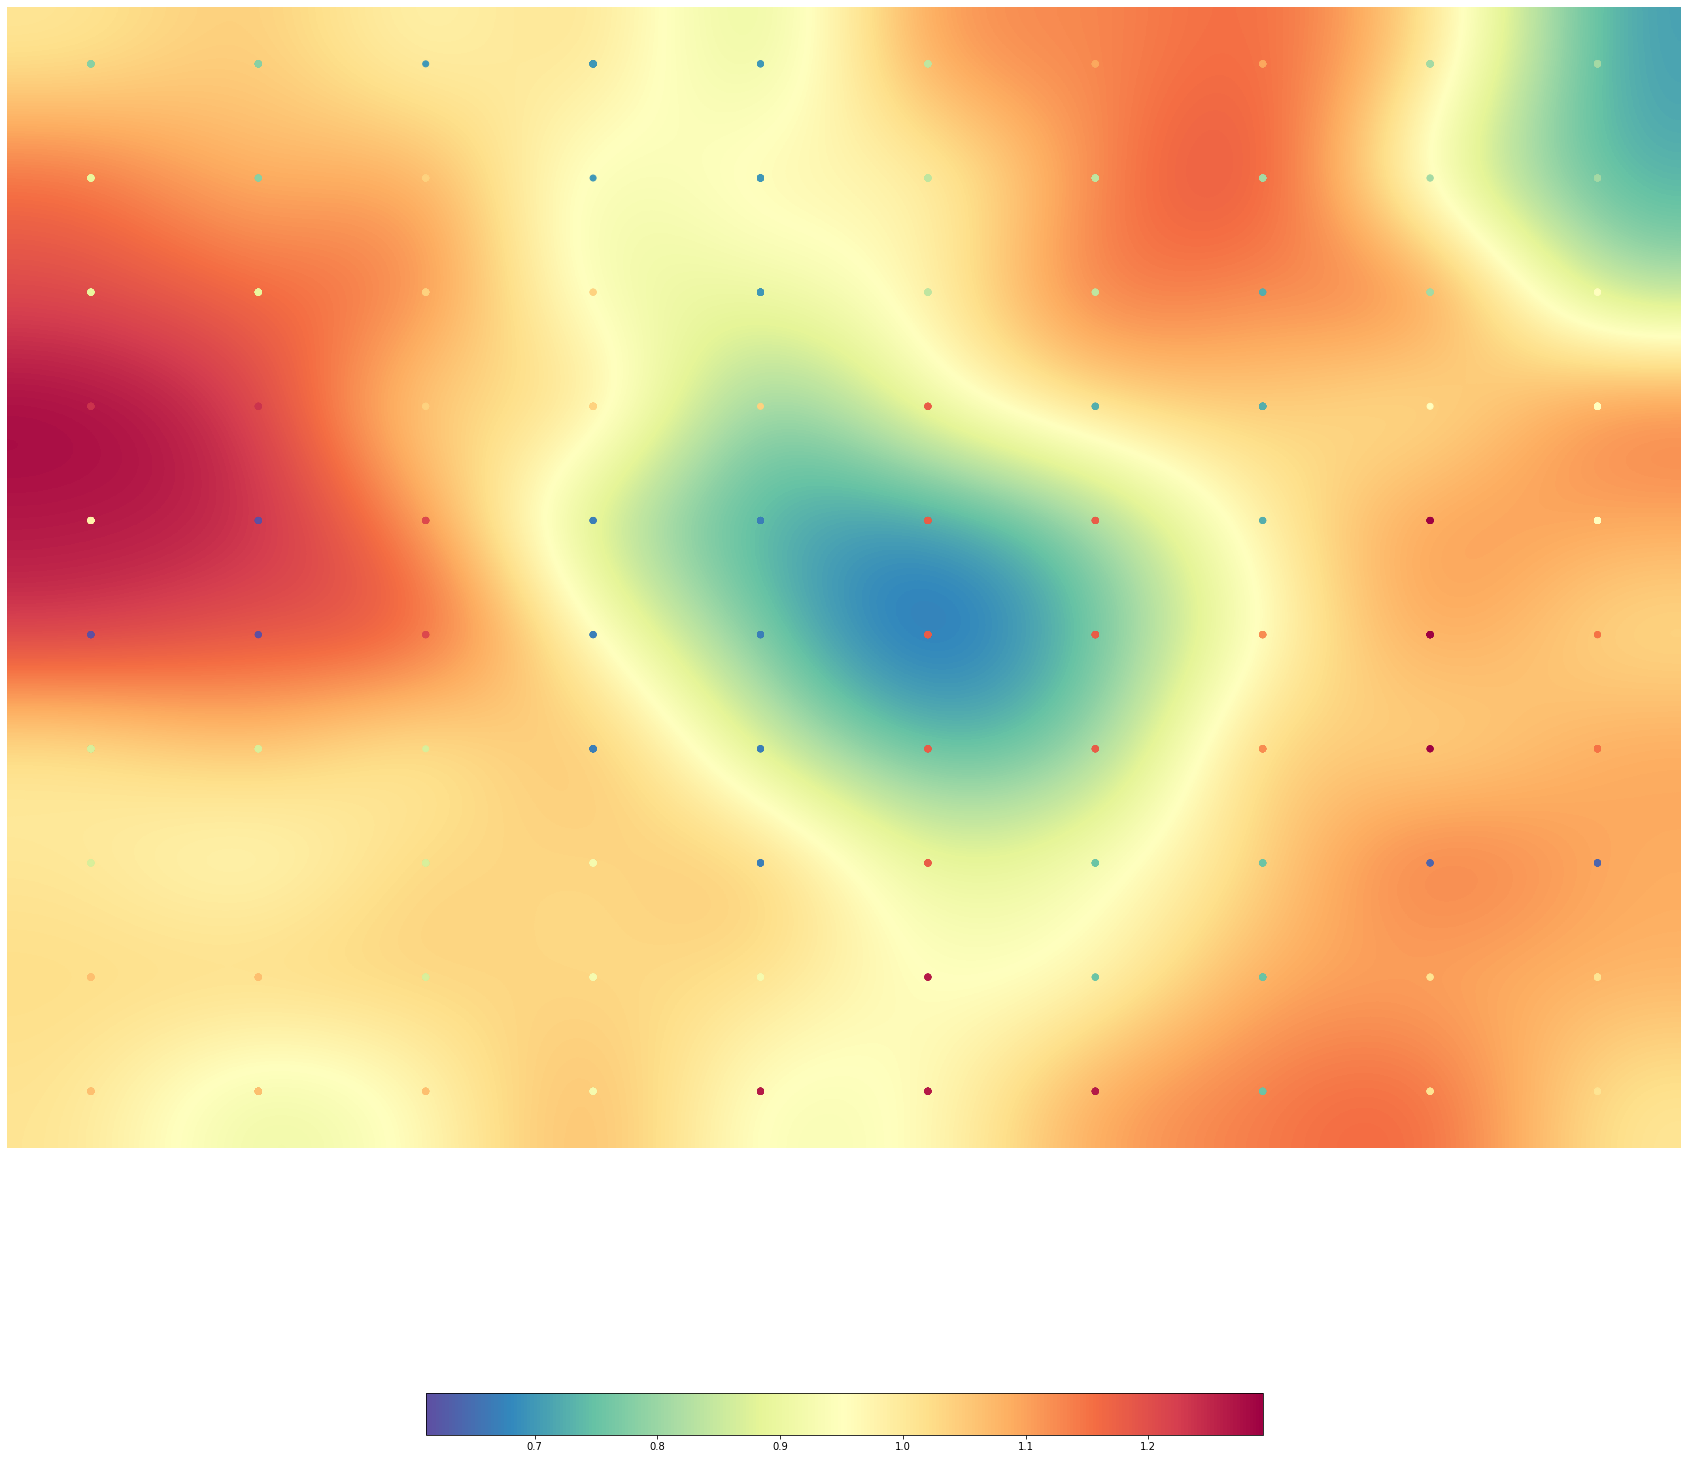

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [331]:
som.view_umatrix(bestmatches=True, figsize=(30, 30), colorbar=True)

In [315]:
som.clusters

array([[ 6,  6,  3,  3,  3,  8, 17, 17,  7,  7],
       [10,  6, 15,  3,  3,  8,  8,  7,  7,  7],
       [10, 10, 15, 15,  3,  8,  8,  4,  7, 12],
       [22, 22, 15, 15, 15, 20,  4,  4, 12, 12],
       [13,  0, 21,  2,  2, 20, 20,  4, 24, 12],
       [ 0,  0, 21,  2,  2, 20, 20, 18, 24, 19],
       [ 9,  9,  9,  2,  2, 20, 20, 18, 24, 19],
       [ 9,  9,  9, 11,  2, 20,  5,  5,  1,  1],
       [16, 16,  9, 11, 11, 23,  5,  5, 14, 14],
       [16, 16, 16, 11, 23, 23, 23,  5, 14, 14]])

Τέλος, χρησιμοποιώντας πάλι την np.unique (με διαφορετικό όρισμα) και την np.argsort (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters.

In [316]:
indices, counts = np.unique(som.clusters,return_counts=True)

In [317]:
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [318]:
counts

array([3, 2, 7, 6, 4, 5, 3, 6, 5, 7, 3, 4, 4, 1, 4, 6, 5, 2, 2, 2, 8, 2,
       2, 4, 3])

In [319]:
count_sort_ind = np.argsort(-counts)

In [320]:
indices_sorted=indices[count_sort_ind]

In [321]:
count_sorted = np.sort(counts)

In [322]:
count_sorted

array([1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6,
       7, 7, 8])

In [323]:
indices_sorted

array([20,  2,  9,  3,  7, 15,  5, 16,  8, 12,  4, 11, 23, 14,  0, 10,  6,
       24, 17, 18, 19,  1, 21, 22, 13])


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. 

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [324]:
def print_categories_stats(movie_IDs):
    total_categories = []
    for ID in movie_IDs:
        category = [cat.strip(" ").strip('"') for cat in categories[ID][0].split(",")]
        total_categories.extend(category)
    
    freqs, counts = np.unique(total_categories, return_counts = True) 
    sorted_idx = np.argsort(counts)[::-1] 
    
    stats = [(freqs[i], counts[i]) for i in sorted_idx]
    
    print('Overall Cluster Genres stats:')
    print(stats)
    return stats

In [325]:
def print_cluster_neurons_movies_report(cluster_ID, bmus, indices, som_model):
    cluster_bmus = np.column_stack(np.where(som_model.clusters==cluster_ID)[::-1])
    
    neuron_idx = []
    for bmu in cluster_bmus:
        if bmu in bmus:
            neuron_idx.append(bmu)

    return neuron_idx

In [326]:
def neuron_movies_report(neurons, som_model):
    indices = []
    for neuron in neurons:
        indices.append(list(np.where(np.all(neuron==som_model.bmus,axis=1))[0]))
    indices = np.concatenate(indices)
    indices = [int(x) for x in indices] 
    stats = print_categories_stats(indices)
    return indices, stats

In [327]:
cluster_bmus = print_cluster_neurons_movies_report(12, u, indices, som)
indices_, _ = neuron_movies_report(cluster_bmus, som)

Overall Cluster Genres stats:
[('Comedy', 38), ('Romantic comedy', 35), ('Romance Film', 35), ('Drama', 10), ('Indie', 9), ('Black-and-white', 8), ('Musical', 6), ('Screwball comedy', 4), ('Fantasy', 4), ('Musical comedy', 4), ('Romantic drama', 3), ('Comedy-drama', 3), ('Parody', 3), ('Film adaptation', 2), ('Comedy of Errors', 2), ('Crime Fiction', 2), ('Action/Adventure', 2), ('Costume drama', 2), ('Crime Comedy', 2), ('Comedy of manners', 2), ('World cinema', 1), ('Comedy Western', 1), ('Buddy film', 1), ('Adventure', 1), ('Cult', 1), ('Media Satire', 1), ('Family Film', 1), ('Western', 1), ('Period piece', 1), ('Political cinema', 1), ('Political satire', 1), ('Romantic fantasy', 1), ('Satire', 1), ('Science Fiction', 1), ('Short Film', 1), ('Silent film', 1), ('Slapstick', 1), ('Teen', 1), ('Television movie', 1), ('Action', 1)]



## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.


Αφού έχουμε 1000 ταινίες δοκιμάζουμε με αριθμό νευρώνων μικρότερο των 1000

In [341]:
n_rows, n_columns = 20,20
som2 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som2.train(final_set,epochs=100)

CPU times: user 39.8 s, sys: 189 ms, total: 40 s
Wall time: 10.5 s


In [342]:
som2.cluster(KMeans(n_clusters=25))

In [335]:
u2, indices2 = np.unique(som2.bmus,axis=0,return_index=True)

Παρατηρούμε ότι με περισσότερους νευρώνες έχουμε καλύτερα διαχωρισμένα clusters καθώς μειώθηκε η κόκκινη περιοχή που δείχνει μεγάλη απόσταση μεταξή των νευρώνων και συνεπώς διαχωρισμό μεταξύ των αντικειμένων ενώ μεγάλωσε η μπλε περιοχή κάτι που δείχνει πολύ μικρή απόσταση μεταξύ των νευρώνωνκαι επομένως εύρεση μιας κατηγορίας. Επίσης, γίνονται πιο έντονες οι γραμμές διαχωρισμού.

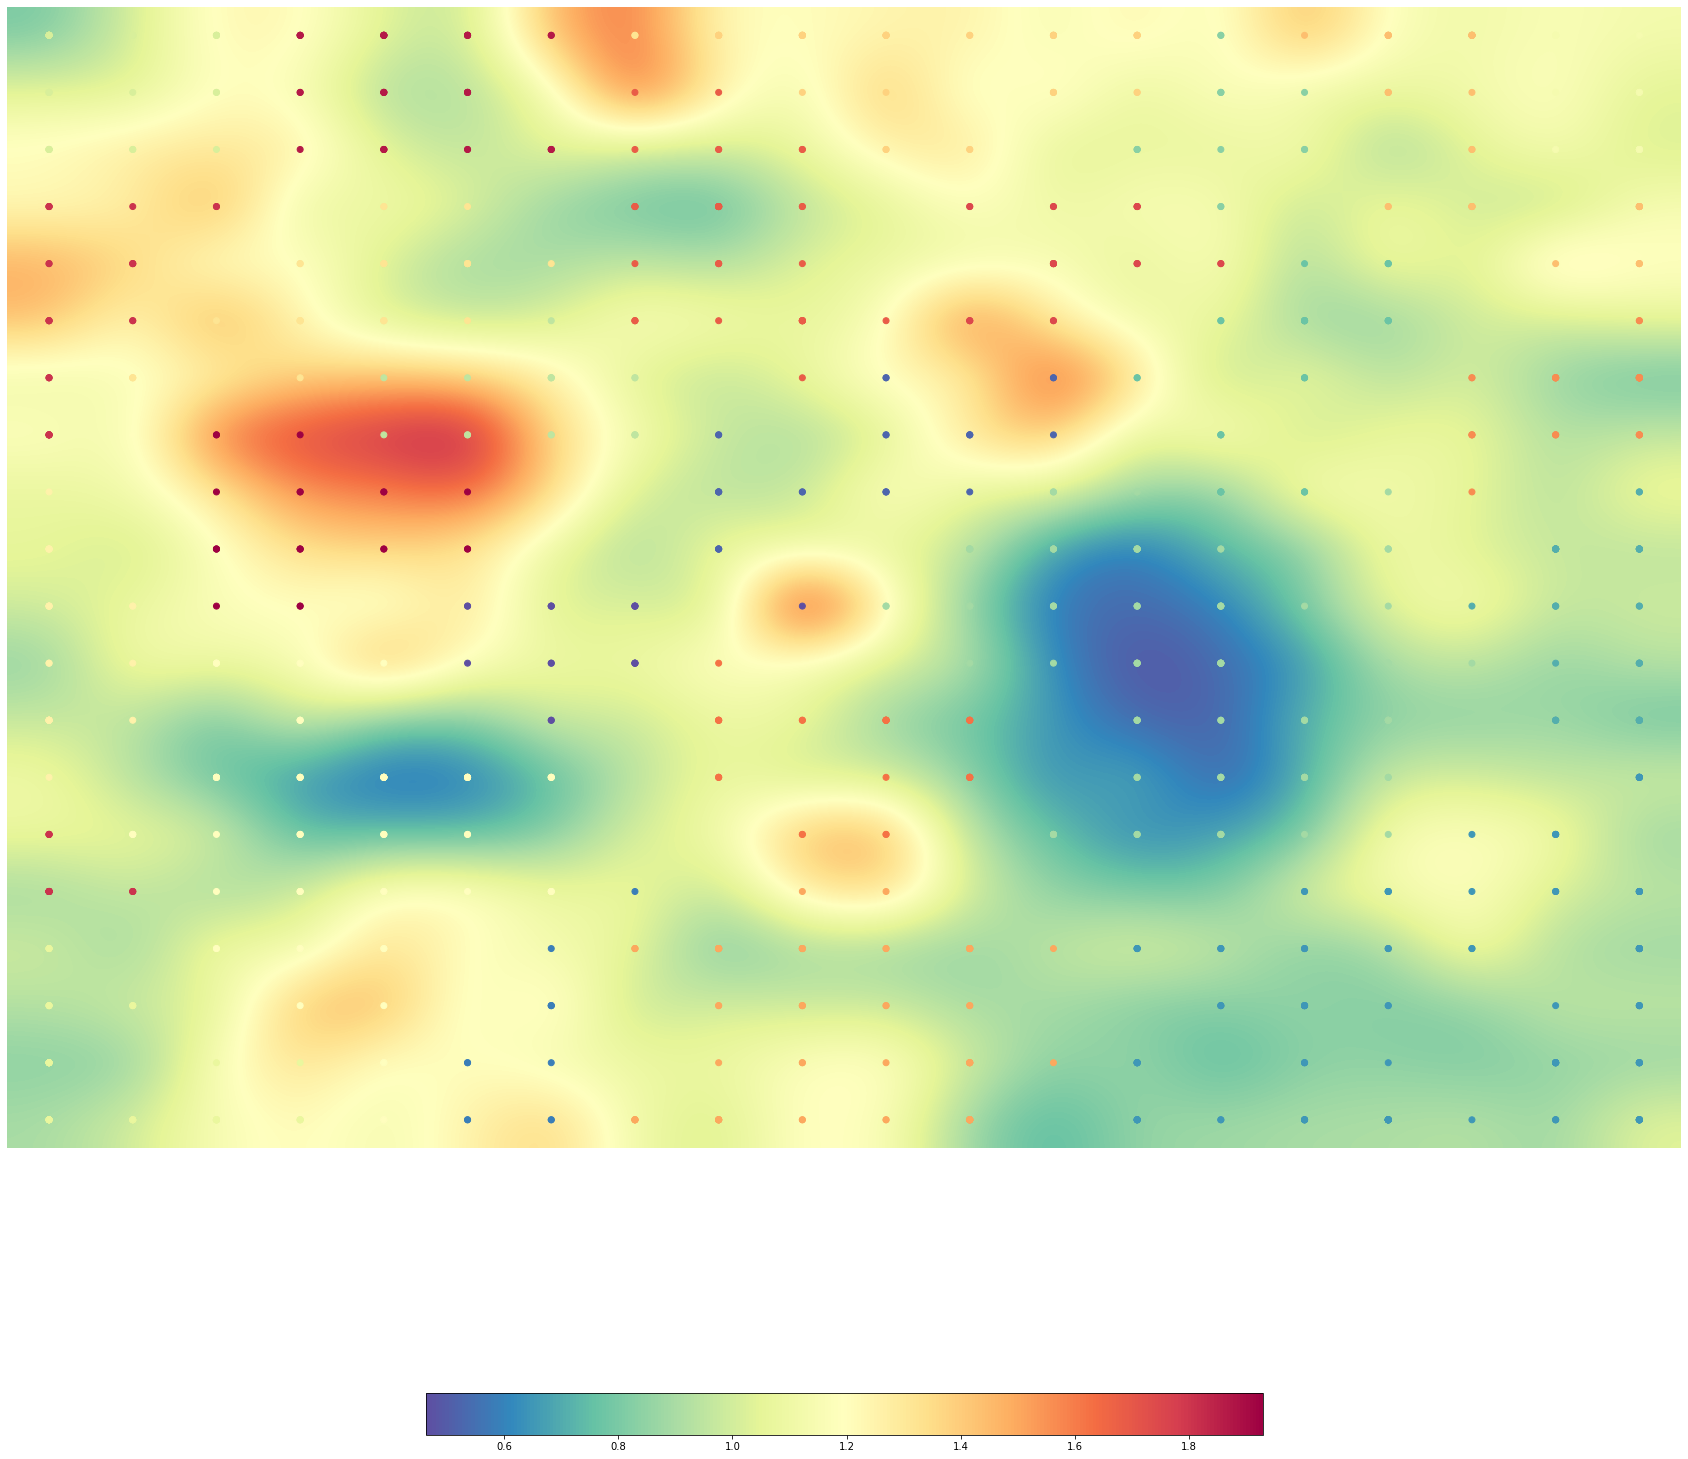

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [343]:
som2.view_umatrix(bestmatches=True, figsize=(30, 30), colorbar=True)

In [344]:
som2.clusters

array([[ 9,  9,  9, 23, 23, 23, 23, 14, 15, 15, 15, 15, 15, 15,  6, 16,
        16, 16, 11, 11],
       [ 9,  9,  9, 23, 23, 23, 23, 20, 20, 15, 15, 15, 15, 15,  6,  6,
        16, 16, 11, 11],
       [ 9,  9,  9, 23, 23, 23, 23, 20, 20, 20, 15, 15, 15,  6,  6,  6,
        16, 16, 11, 11],
       [22, 22, 22, 14, 14, 14, 20, 20, 20, 20, 20, 21, 21, 21,  6,  6,
        16, 16, 16, 16],
       [22, 22, 22, 14, 14, 14, 14, 20, 20, 20, 20, 21, 21, 21, 21,  5,
         5, 16, 16, 16],
       [22, 22, 14, 14, 14, 14,  8, 20, 20, 20, 20, 21, 21, 21,  5,  5,
         5,  5, 18, 18],
       [22, 14, 14, 14,  8,  8,  8,  8, 20, 20,  1,  1,  1,  5,  5,  5,
         5, 18, 18, 18],
       [22, 12, 24, 24,  8,  8,  8,  8,  1,  1,  1,  1,  1,  5,  5,  5,
        18, 18, 18, 18],
       [13, 14, 24, 24, 24, 24,  8,  1,  1,  1,  1,  1,  7,  7,  5,  5,
         7, 18,  4,  4],
       [13, 13, 24, 24, 24, 24,  3,  0,  1,  1,  7,  7,  7,  7,  7,  7,
         7,  4,  4,  4],
       [13, 13, 24, 24, 24,  0

In [345]:
print("Clusters sorted by increasing number of neurons:")
vals, counts = np.unique(som2.clusters,return_counts=True)
sorted_counts = np.argsort(counts) # increasing sort
np.array([list(vals[sorted_counts]),list(counts[sorted_counts])])

Clusters sorted by increasing number of neurons:


array([[11,  6,  2,  9, 21, 18, 13,  8,  0,  4, 23, 22, 24, 10, 15, 16,
        19,  5,  1, 14, 20, 17, 12,  3,  7],
       [ 6,  8,  9,  9, 10, 10, 10, 10, 12, 12, 12, 13, 13, 13, 14, 14,
        14, 15, 15, 16, 20, 27, 34, 39, 45]])

In [346]:
cluster_bmus = print_cluster_neurons_movies_report(10, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Comedy', 44), ('Drama', 44), ('Romance Film', 12), ('Comedy-drama', 11), ('Indie', 9), ('Black comedy', 7), ('Film adaptation', 6), ('Parody', 5), ('Family Film', 5), ('Romantic comedy', 5), ('Coming of age', 4), ('Science Fiction', 3), ('Musical', 3), ('Japanese Movies', 2), ('Crime Fiction', 2), ('Fantasy', 2), ('Comedy of manners', 2), ('Teen', 2), ("Children's/Family", 2), ('World cinema', 2), ('Period piece', 2), ('Political cinema', 2), ('Screwball comedy', 2), ('Satire', 2), ('Romantic drama', 2), ('Melodrama', 1), ('Costume drama', 1), ('Biopic [feature]', 1), ('Surrealism', 1), ('Black-and-white', 1), ('Buddy film', 1), ('Sports', 1), ('Short Film', 1), ('Crime Comedy', 1), ('Musical comedy', 1), ('Roadshow theatrical release', 1), ('Docudrama', 1), ('Documentary', 1), ('Domestic Comedy', 1), ('Road movie', 1), ('Experimental film', 1), ('Family Drama', 1), ('Mystery', 1), ('Americana', 1)]


In [347]:
n_rows, n_columns = 30,30
som3 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som3.train(final_set,epochs=100)
som3.cluster(KMeans(n_clusters=30))

CPU times: user 1min 29s, sys: 216 ms, total: 1min 29s
Wall time: 23 s


Παρατηρούμε ακόμη καλύτερο διαχωρισμό αλλά αυτό μπορεί να οφείλεται και στην αύξηση των νευρώνων επομένως και στην απομάκρυνση των αντικειμένων και όχι απαραίτητα στην καλύτερη ομαδοποίησή τους.

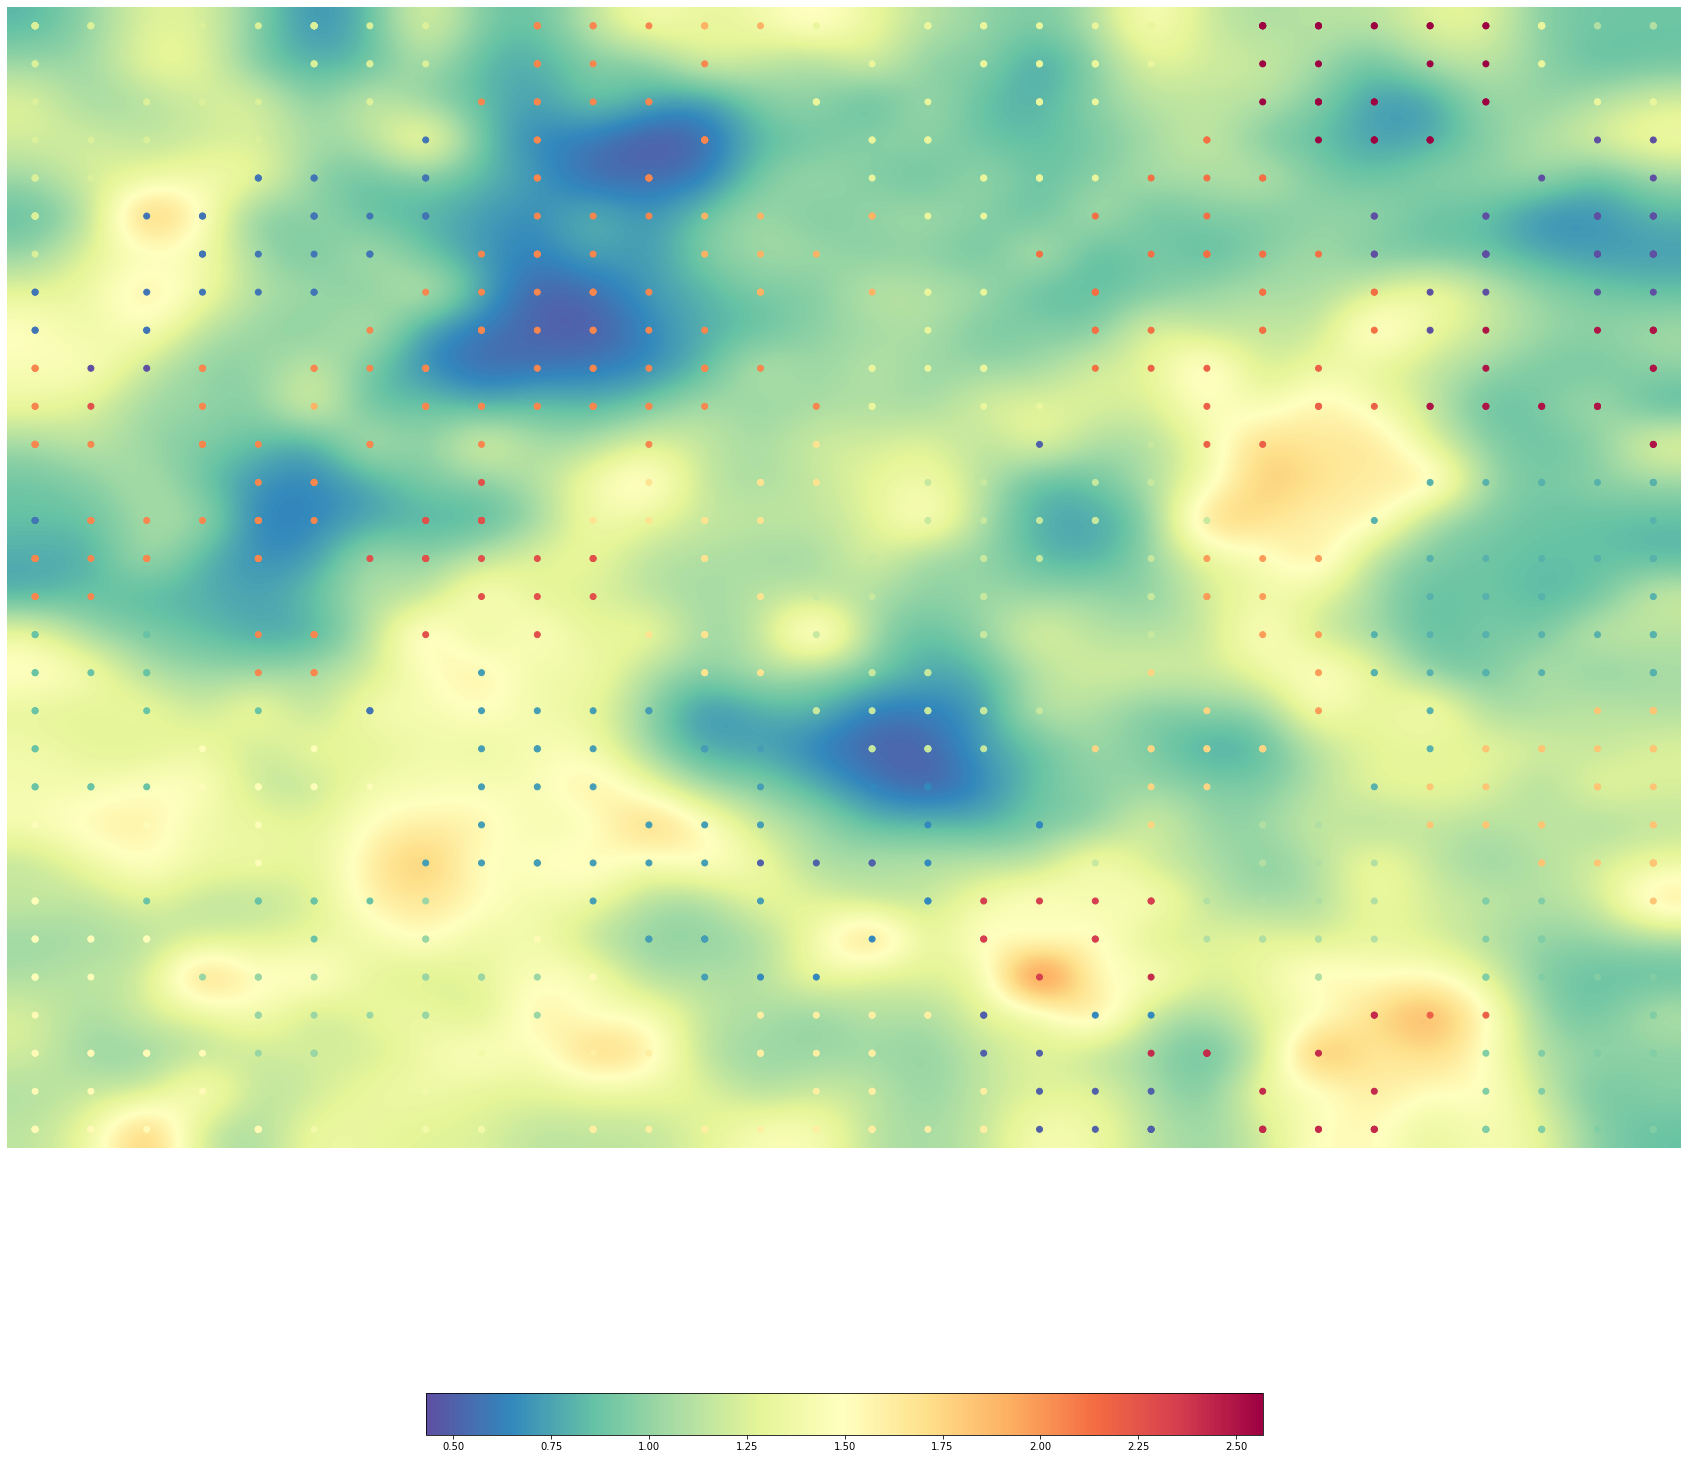

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [348]:
som3.view_umatrix(bestmatches=True, figsize=(30, 30), colorbar=True)



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook. Η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν είναι χάρτης SOM καιδεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας.

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

* 1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.

Αρχικά, προσδιορίζουμε όλες τις μοναδικές κατηγορίες που εμφανίζονται στο subset των 1000 ταινιών σε συνδυασμό με τις συχνότητες εμφάνισης τους.

In [349]:
category_set = []

for movie in range(len(final_set)):
    cat = [category.strip(" ").strip('"') for category in categories[movie][0].split(",")]
    for categ in cat:
        category_set.append(categ)

cat_freqs = {i:category_set.count(i) for i in set(category_set)}

cat_freqs_sorted = sorted(cat_freqs.items(), key=lambda cat_freqs: -cat_freqs[1])
print(cat_freqs_sorted)

[('Drama', 448), ('Comedy', 265), ('Thriller', 161), ('Romance Film', 143), ('Action', 132), ('Crime Fiction', 108), ('Horror', 107), ('World cinema', 102), ('Indie', 93), ('Black-and-white', 86), ('Action/Adventure', 77), ('Family Film', 72), ('Adventure', 70), ('Short Film', 70), ('Musical', 61), ('Science Fiction', 60), ('Mystery', 59), ('Romantic drama', 52), ('Crime Thriller', 48), ('Romantic comedy', 46), ('Fantasy', 44), ('Animation', 42), ('Film adaptation', 37), ('War film', 37), ('Documentary', 35), ('Comedy film', 34), ('Psychological thriller', 33), ('Japanese Movies', 31), ('Silent film', 30), ('Parody', 27), ('Slasher', 26), ('Comedy-drama', 25), ('Chinese Movies', 25), ('Sports', 24), ('Teen', 24), ('Period piece', 22), ('Black comedy', 21), ('Western', 20), ('Bollywood', 19), ('Television movie', 19), ('Cult', 19), ("Children's/Family", 19), ('Family Drama', 17), ('Biographical film', 17), ('Martial Arts Film', 17), ('Satire', 17), ('Biography', 17), ('Screwball comedy'

Παρατηρούμε ότι στο υποσύνολο των 1000 ταινιών, οι πιο συνηθισμένες κατηγορίες είναι **Drama, Comedy, Thriller**, ενώ οι πιο σπάνιες είναι αυτές που εμφανίζονται μόλις 1 φορά (πχ Backstage Musical, Extreme Sports).

In [350]:
distinct_categories = np.array([tupl[0] for tupl in cat_freqs_sorted])

In [351]:
total_neurons_per_cat = {}
for clusterID in range(30):
    ID_list, stats = neuron_movies_report([clusterID],som2)
    for pair in stats:
        if pair[0] in total_neurons_per_cat:
            total_neurons_per_cat[pair[0]] += pair[1]
        else:
            total_neurons_per_cat[pair[0]] = pair[1]

total_neurons_per_cat = sorted(total_neurons_per_cat.items(), key=lambda total_neurons_per_cat: -total_neurons_per_cat[1])

Overall Cluster Genres stats:
[('Romantic drama', 11), ('Romance Film', 11), ('Drama', 11), ('Film adaptation', 4), ('World cinema', 2), ('Thriller', 2), ('Period piece', 2), ('Tragedy', 1), ('Sports', 1), ('Music', 1), ('Melodrama', 1), ('Marriage Drama', 1), ('Horror', 1), ('Crime Thriller', 1), ('Crime Fiction', 1), ('Chinese Movies', 1)]
Overall Cluster Genres stats:
[('Romance Film', 1), ('Film adaptation', 1), ('Drama', 1)]
Overall Cluster Genres stats:
[('Short Film', 1), ('Romance Film', 1), ('Mystery', 1), ('Drama', 1)]
Overall Cluster Genres stats:
[]
Overall Cluster Genres stats:
[('Musical', 3), ('Comedy film', 1)]
Overall Cluster Genres stats:
[('Sports', 1), ('Historical drama', 1)]
Overall Cluster Genres stats:
[('Japanese Movies', 2), ('World cinema', 1), ('Social issues', 1), ('Science Fiction', 1), ('Musical', 1), ('Culture & Society', 1), ('Bollywood', 1)]
Overall Cluster Genres stats:
[('Science Fiction', 3), ('Japanese Movies', 2), ('World cinema', 1), ('Fantasy', 

In [71]:
print('Most Activated Categories:\n')
for i in range(5):
    print(total_neurons_per_cat[i])
print('\nLeast Activated Categories:\n')
for i in range(1,6):
    print(total_neurons_per_cat[-i])

Most Activated Categories:

('Comedy', 14)
('Romance Film', 12)
('Black-and-white', 10)
('Horror', 10)
('Romantic comedy', 9)

Least Activated Categories:

('Comedy film', 1)
('Cult', 1)
('Fantasy', 1)
('Crime Fiction', 1)
('Archaeology', 1)


Παρατηρούμε ότι πράγματι οι κατηγορίες που έχουν μεγαλύτερες συχνότητες εμφάνισης, όπως Comedy, Thriller, Mystery, τείνουν να απεικονίζονται σε περισσότερους νευρώνες στον χώρο μειωμένης διαστατικότητας, σε αντίθεση με τις πιο σπάνιες κατηγορίες, οι οποίες ενεργοποιούν μόλις έναν νευρώνα.

* 2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.

In [352]:
cluster_bmus = print_cluster_neurons_movies_report(13, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Short Film', 27), ('Comedy', 24), ('Animation', 13), ('Family Film', 12), ('Black-and-white', 11), ('Slapstick', 2), ('Silent film', 1), ('Screwball comedy', 1), ('Romance Film', 1), ('Parody', 1), ('Mockumentary', 1), ('Computer Animation', 1), ('Comedy of Errors', 1), ('Airplanes and airports', 1)]


In [353]:
cluster_bmus = print_cluster_neurons_movies_report(21, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Action', 18), ('Drama', 18), ('War film', 8), ('Action/Adventure', 6), ('World cinema', 4), ('Thriller', 4), ('Romance Film', 3), ('Crime Fiction', 2), ('Period piece', 2), ('Comedy', 2), ('Comedy-drama', 1), ('Tragedy', 1), ('Adventure', 1), ('Blaxploitation', 1), ('Combat Films', 1), ('Comedy film', 1), ('Science Fiction', 1), ('Costume drama', 1), ('Romantic drama', 1), ('Spy', 1), ('Epic', 1), ('Historical drama', 1), ('History', 1), ('Dystopia', 1)]


Παρατηρούμε ότι το cluster 13 ενεργοποιεί κυρίως κατηγορίες Black and White, silent film και family film, ενώ το cluster 21 ενεργοποιεί κυρίως κατηγορίες Action, War Film και Action/adventure.

* 3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

In [74]:
cluster_bmus = print_cluster_neurons_movies_report(4, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Thriller', 13), ('Mystery', 12), ('Drama', 11), ('Psychological thriller', 8), ('Supernatural', 3), ('Fantasy', 2), ('Romance Film', 2), ('World cinema', 1), ('Crime Fiction', 1), ('Disaster', 1), ('Erotic thriller', 1), ('Neo-noir', 1), ('Film noir', 1), ('Political thriller', 1), ('Suspense', 1), ('Television movie', 1), ('Black-and-white', 1)]


In [75]:
cluster_bmus = print_cluster_neurons_movies_report(12, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Drama', 13), ('Adventure', 12), ('Action/Adventure', 4), ('Historical fiction', 4), ('War film', 3), ('Biographical film', 3), ('Biopic [feature]', 3), ('History', 2), ('Costume drama', 2), ('Epic', 2), ('World cinema', 2), ('Science Fiction', 2), ('Horror', 1), ('Western', 1), ('Remake', 1), ('Road movie', 1), ('Crime Fiction', 1), ('Roadshow theatrical release', 1), ('Costume Adventure', 1), ('Comedy', 1), ('Christian film', 1), ('Sports', 1), ('Television movie', 1), ('Historical Epic', 1)]


Εδώ, παρατηρούμε ότι στο cluster με αριθμό 4 απεικονίζονται ταινίες Action, Drama και War film. Στο γειτονικό του cluster με αριθμό 12, απεικονίζονται Action, Adventure και Martial Arts Film. Τα πρότυπα εισόδου αυτά καθώς απεικονίζονται σε κοντινά clusters στο επίπεδο, είναι μεταξύ τους κοινά, αφού διέπονται από το κοινό στοιχείο της δράσης.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

* Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.

Βλέποντας καλύτερα τον χάρτη απεικόνισης εστιάζουμε στο μικρό cluster με ID = 4 και τα γειτονικά του clusters:

In [76]:
cluster_bmus = print_cluster_neurons_movies_report(4, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Thriller', 13), ('Mystery', 12), ('Drama', 11), ('Psychological thriller', 8), ('Supernatural', 3), ('Fantasy', 2), ('Romance Film', 2), ('World cinema', 1), ('Crime Fiction', 1), ('Disaster', 1), ('Erotic thriller', 1), ('Neo-noir', 1), ('Film noir', 1), ('Political thriller', 1), ('Suspense', 1), ('Television movie', 1), ('Black-and-white', 1)]


Παρατηρούμε ότι το εν λόγω cluster φαίνεται να μην έχει αυστηρά καθορισμένα χαρακτηριστικά, καθώς ενεργοποιεί κατηγορίες που δεν μοιάζουν, τις action και drama. 

Συνορεύει με τα clusters 12 και 10, τα οποία συνδέονται κυρίως με τη δράση και τα 16 και 6,τα οποία συνδέονται κυρίως με το δράμα:

In [77]:
cluster_bmus = print_cluster_neurons_movies_report(12, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Drama', 13), ('Adventure', 12), ('Action/Adventure', 4), ('Historical fiction', 4), ('War film', 3), ('Biographical film', 3), ('Biopic [feature]', 3), ('History', 2), ('Costume drama', 2), ('Epic', 2), ('World cinema', 2), ('Science Fiction', 2), ('Horror', 1), ('Western', 1), ('Remake', 1), ('Road movie', 1), ('Crime Fiction', 1), ('Roadshow theatrical release', 1), ('Costume Adventure', 1), ('Comedy', 1), ('Christian film', 1), ('Sports', 1), ('Television movie', 1), ('Historical Epic', 1)]


In [78]:
cluster_bmus = print_cluster_neurons_movies_report(10, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Drama', 23), ('Comedy', 23), ('Comedy-drama', 8), ('Black comedy', 4), ('Crime Fiction', 3), ('World cinema', 3), ('Musical', 2), ('Coming of age', 2), ('Biopic [feature]', 1), ('Romantic drama', 1), ('Black-and-white', 1), ('Buddy film', 1), ('Road movie', 1), ('Parody', 1), ('Musical comedy', 1), ('Melodrama', 1), ('Docudrama', 1), ('Domestic Comedy', 1), ('Surrealism', 1), ('Family Drama', 1), ('Fantasy', 1), ('Japanese Movies', 1), ('Action', 1)]


In [79]:
cluster_bmus = print_cluster_neurons_movies_report(16, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Adventure', 18), ('Action', 11), ('Black-and-white', 4), ('Thriller', 3), ('Comedy', 3), ('Spy', 2), ('Romance Film', 2), ('Western', 1), ('War film', 1), ('Science Fiction', 1), ('Jungle Film', 1), ('Indie', 1), ('Action/Adventure', 1)]


In [80]:
cluster_bmus = print_cluster_neurons_movies_report(6, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Crime Fiction', 29), ('Drama', 24), ('Action', 6), ('Comedy film', 5), ('Crime Thriller', 4), ('Indie', 3), ('Psychological thriller', 3), ('Television movie', 3), ('Courtroom Drama', 2), ('World cinema', 2), ('Melodrama', 1), ('Suspense', 1), ('Action/Adventure', 1), ('Addiction Drama', 1), ('Biographical film', 1), ('Biography', 1), ('Black-and-white', 1), ('Chinese Movies', 1), ('Teen', 1), ('Sports', 1), ('Period piece', 1), ('Short Film', 1), ('Docudrama', 1), ('Science Fiction', 1), ('Dystopia', 1), ('Political drama', 1), ('Gangster Film', 1), ('Historical fiction', 1), ('Film adaptation', 1)]


Παρατηρούμε λοιπόν ότι το πολύ μικρό cluster με ID = 4, βρίσκεται στη συγκεκριμένη θέση του χάρτη για να αποτελέσει ένα είδος μετάβασης από το δράμα στη δράση.

* Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε

Εστιάζουμε στα clusters στις πιο κόκκινες περιοχές του χάρτη απεικόνισης, δηλαδή στο cluster 24 όπου βλέπουμε μια έντονα κόκκινη περιοχή. Εκεί παρατηρούμε ότι όντως έχουμε μεγάλο εύρος διαφορετικών κατηφοιών όπως comedy, fantasy adventure, musical, science fiction επομένως είναι λογικό να έχουν μεταξύ τους τόσο μεγάλες αποστάσεις και συνεπώς προκύπτει τοκόκκινο χρώμα.

In [355]:
cluster_bmus = print_cluster_neurons_movies_report(24, u2, indices2, som2)
indices_,_ = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Family Film', 19), ('Comedy', 14), ("Children's/Family", 9), ('Adventure', 9), ('Fantasy', 8), ('Animation', 8), ("Children's Fantasy", 6), ('Musical', 3), ('Science Fiction', 3), ('Family-Oriented Adventure', 3), ('Drama', 3), ('Animal Picture', 2), ('Animated Musical', 2), ('Adventure Comedy', 2), ('Alien Film', 1), ('Comedy of Errors', 1), ('Black comedy', 1), ('Action/Adventure', 1), ('Christmas movie', 1), ('Thriller', 1), ('Domestic Comedy', 1), ('Computer Animation', 1), ('Creature Film', 1), ('Superhero movie', 1), ('Fantasy Adventure', 1), ('Fantasy Comedy', 1), ('Heaven-Can-Wait Fantasies', 1), ('Japanese Movies', 1), ('Music', 1), ('Period piece', 1), ('Slapstick', 1), ('Stop motion', 1), ('Superhero', 1), ('Action', 1)]



# Τελική παράδοση άσκησης

- Θα παραδώσετε στο helios το παρόν notebook επεξεργασμένο ή ένα ή δύο νέα zipαρισμένα με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα</font>
</td>
  </tr>
</table>